# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import Stock Price Dataset

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Use the Open Stock Price Column to Train Your Model.

In [4]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


#  Normalizing the Dataset.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Creating X_train and y_train Data Structures.

In [6]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


# Reshape the Data.

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1198, 60, 1)

# Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


# Fitting the Model.

In [11]:
regressor.compile(optimizer= 'adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 128ms/step - loss: 0.0379
Epoch 2/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0051
Epoch 13/100

# Extracting the Actual Stock Prices of Jan-2017.

In [12]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

# Preparing the Input for the Model.

In [13]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

#  Predicting the Values for Jan 2017 Stock Prices.

In [14]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

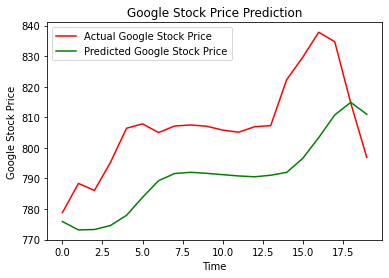

In [15]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color= 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

# Plotting the Actual and Predicted Prices for Google Stocks.

# JOB DONE!!